In [14]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r"E:\Fake News Detection ML Project\Files\kaggle_fake_train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [12]:
df.shape

(20800, 5)

In [4]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

<Axes: ylabel='Frequency'>

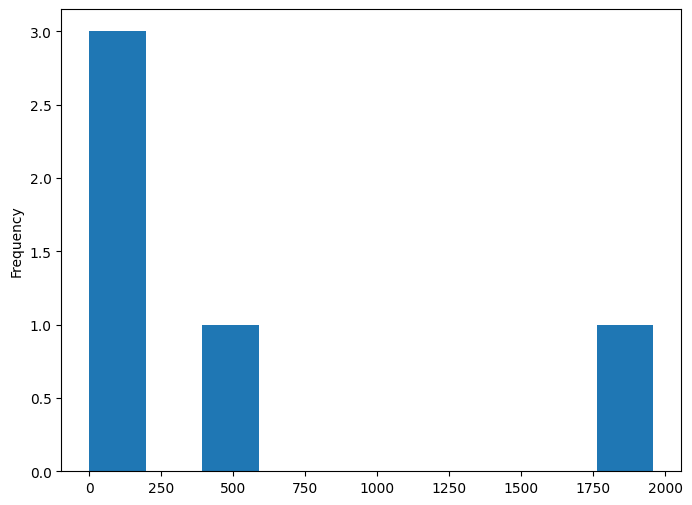

In [5]:
df.isnull().sum().plot(kind="hist", figsize=(8,6))

In [11]:
df.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [7]:
df.describe(include="all")

,id,title,author,text,label
count,20800.000000,20242,18843,20761,20800.000000
unique,NaN,19803,4201,20386,NaN
top,NaN,Get Ready For Civil Unrest: Survey Finds That ...,Pam Key,,NaN
freq,NaN,5,243,75,NaN
mean,10399.500000,NaN,NaN,NaN,0.500625
std,6004.587135,NaN,NaN,NaN,0.500012
min,0.000000,NaN,NaN,NaN,0.000000
25%,5199.750000,NaN,NaN,NaN,0.000000
50%,10399.500000,NaN,NaN,NaN,1.000000
75%,15599.250000,NaN,NaN,NaN,1.000000


In [9]:
df.duplicated().sum()

0

In [13]:
df.nunique()

id        20800
title     19803
author     4201
text      20386
label         2
dtype: int64